In [ ]:
# Import tools that we will need:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
 # Set working directory
 os.chdir("/content")

#**Preliminary Cleaning**

In [ ]:
# put the name of file uploaded in the woking directory "/content"
data=pd.read_csv('{}.csv')
data.head(2)

,country,year,cpi,gdppc,category
0,Argentina,2012,35,19641.35286,Spanish
1,Argentina,2013,34,20131.68042,Spanish


In [ ]:
# change values into numeric, put column names in {}
data['{}'] = pd.to_numeric(data['{}'],errors='coerce')
data['{}'] = pd.to_numeric(data['{}'],errors='coerce')

#**Plotting Dataset and Line**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


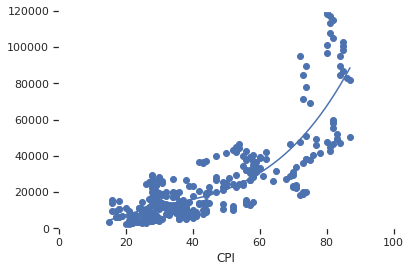

In [ ]:
# put column in {}
x = data['{}']
y = data['{}']

# the order of the polynomial regression in the {} ie 2, 3, 4...
poly_model = make_pipeline(PolynomialFeatures({}),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

# name the y and x axis
plt.ylabel('{}')
plt.xlabel('{}')

# set the domains for y and x
plt.ylim([0,100])
plt.xlim([0,100])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    


#**Plotting Dataset and Line for 2020**

In [ ]:
# dropping years not 2020 from the dataset
midDataII = data.drop(data[data.year < 2020].index) 

# dropping missing values
dataII = midDataII.dropna()

In [ ]:
dataII

,country,year,cpi,gdppc,category
8,Argentina,2020,42,20762.991680,Spanish
17,Armenia,2020,49,13307.156610,Russian
26,Azerbaijan,2020,30,14474.313360,Russian
35,Belarus,2020,47,20231.665010,Russian
44,Colombia,2020,39,14570.236740,Spanish
53,"Egypt, Arab Rep.",2020,33,12602.309270,British
62,Estonia,2020,75,37925.116800,Russian
71,Georgia,2020,56,14761.477070,Russian
80,Guatemala,2020,25,8850.373033,Spanish
89,India,2020,40,6501.526071,British


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


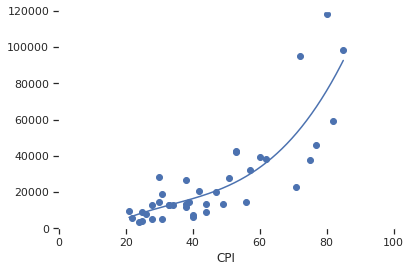

In [ ]:
# plotting new dataset for only year 2020
x2 = dataII['{}']
y2 = dataII['{}']

poly_model = make_pipeline(PolynomialFeatures({}),
                           LinearRegression())
poly_model.fit(x2[:, np.newaxis], y2)
xfit2 = np.linspace(min(x2), max(x2), 1000)
yfit2 = poly_model.predict(xfit2[:, np.newaxis])

plt.scatter(x2, y2)
plt.plot(xfit2, yfit2);
plt.ylabel('{}')
plt.xlabel('{}')
plt.ylim([0,100])
plt.xlim([0,100])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  


#**Saving CSV Files**

Actual chart is made in Vegalite

In [ ]:
# create new dataframe from the fitted line
fittedLine = pd.DataFrame(data=np.linspace(min(x2), max(x2), 1000), columns = ['xFitted'])

# add new columns for the y values of the fitted line
fittedLine['yFitted'] = yfit2 

In [ ]:
fittedLine

,xFitted,yFitted
0,21.000000,5997.058071
1,21.064064,6041.121711
2,21.128128,6085.061900
3,21.192192,6128.879264
4,21.256256,6172.574434
...,...,...
995,84.743744,91708.163290
996,84.807808,91940.318790
997,84.871872,92172.976445
998,84.935936,92406.136885


In [ ]:
# downloading from panda data frame to csv, for columns xFitted, yFitted
# name the file in the brackets {}
fittedLine[['xFitted','yFitted']].to_csv("{}.csv")

In [ ]:
# downloading from panda data frame to csv of cleaned data 
# name the file in the brackets {}
dataII.to_csv("{}.csv")